# Data Analysis Seattle Cycle Sharing

In this data analysis we're looking into data about the Seattle cycle share project. It consists of several related datasets, one about stations, one about trips and one about weather.

In this data analysis i'll focus on the relation between weather and number of trips. I have the hypothesis that bad weather means fewer trips and good weather means more. Let's see!

In [18]:
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

First we load the weather data:

In [21]:
df_weather = pd.read_csv('weather.csv', index_col='Date', parse_dates=['Date'])
df_weather.head(n=10)

,Max_Temperature_F,Mean_Temperature_F,Min_TemperatureF,Max_Dew_Point_F,MeanDew_Point_F,Min_Dewpoint_F,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_Pressure_In,Mean_Sea_Level_Pressure_In,Min_Sea_Level_Pressure_In,Max_Visibility_Miles,Mean_Visibility_Miles,Min_Visibility_Miles,Max_Wind_Speed_MPH,Mean_Wind_Speed_MPH,Max_Gust_Speed_MPH,Precipitation_In,Events
Date,,,,,,,,,,,,,,,,,,,,
2014-10-13,71,62.0,54,55,51,46,87,68,46,30.03,29.79,29.65,10,10,4,13,4,21,0.00,Rain
2014-10-14,63,59.0,55,52,51,50,88,78,63,29.84,29.75,29.54,10,9,3,10,5,17,0.11,Rain
2014-10-15,62,58.0,54,53,50,46,87,77,67,29.98,29.71,29.51,10,9,3,18,7,25,0.45,Rain
2014-10-16,71,61.0,52,49,46,42,83,61,36,30.03,29.95,29.81,10,10,10,9,4,-,0.00,Rain
2014-10-17,64,60.0,57,55,51,41,87,72,46,29.83,29.78,29.73,10,10,6,8,3,-,0.14,Rain
2014-10-18,68,64.0,59,59,57,55,90,83,68,29.96,29.90,29.80,10,8,2,10,4,-,0.31,Rain
2014-10-19,73,64.0,55,57,55,53,94,74,52,29.80,29.73,29.67,10,10,6,10,3,18,0.00,NaN
2014-10-20,66,60.0,55,57,54,50,90,78,67,29.80,29.74,29.69,10,10,5,12,5,-,0.44,Rain
2014-10-21,64,58.0,55,52,49,46,87,70,58,29.93,29.85,29.74,10,10,6,15,8,21,0.10,Rain


Then we load the trip data:

In [56]:
df_trips = pd.read_csv('trip.csv', index_col='trip_id', error_bad_lines=False, parse_dates=['starttime', 'stoptime'])
df_trips.head()

,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
trip_id,,,,,,,,,,,
431,2014-10-13 10:31:00,2014-10-13 10:48:00,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0
432,2014-10-13 10:32:00,2014-10-13 10:48:00,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0
433,2014-10-13 10:33:00,2014-10-13 10:48:00,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0
434,2014-10-13 10:34:00,2014-10-13 10:48:00,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0
435,2014-10-13 10:34:00,2014-10-13 10:49:00,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0


I'm extracting the date of each trip as a separate variable, i want to use that to calculate trips per day and join this dataset with the weather data.

In [40]:
import datetime

df_trips['date'] = df_trips['starttime'].apply(lambda x: datetime.date(year=x.year, month=x.month, day=x.day).isoformat())
df_trips.head()

,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear,date
trip_id,,,,,,,,,,,,
431,2014-10-13 10:31:00,2014-10-13 10:48:00,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0,2014-10-13
432,2014-10-13 10:32:00,2014-10-13 10:48:00,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0,2014-10-13
433,2014-10-13 10:33:00,2014-10-13 10:48:00,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0,2014-10-13
434,2014-10-13 10:34:00,2014-10-13 10:48:00,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0,2014-10-13
435,2014-10-13 10:34:00,2014-10-13 10:49:00,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0,2014-10-13


Now i'm going to calculate the number of trips per day, using groupby function of a dataframe.

In [49]:
trips_per_day = df_trips[['date']].groupby('date').size().reset_index(name='counts')
trips_per_day.head()

,date,counts
0,2014-10-13,818
1,2014-10-14,982
2,2014-10-15,626
3,2014-10-16,790
4,2014-10-17,588


In [52]:
trips_per_day = df_trips[['date']].groupby('date').size().reset_index(name='counts')
trips_per_day = trips_per_day.set_index('date')
trips_per_day.head()

,counts
date,
2014-10-13,818
2014-10-14,982
2014-10-15,626
2014-10-16,790
2014-10-17,588


In [53]:
print(type(df_trips[['date']].groupby('date').size().reset_index(name='counts')))

<class 'pandas.core.frame.DataFrame'>


In [54]:
print(type(df_trips['date']))

<class 'pandas.core.series.Series'>


Next step is joining the weather data with the trips_per_day data.

In [132]:
df_combined = df_weather.join(trips_per_day)

df_combined.head()

,Max_Temperature_F,Mean_Temperature_F,Min_TemperatureF,Max_Dew_Point_F,MeanDew_Point_F,Min_Dewpoint_F,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_Pressure_In,...,Min_Sea_Level_Pressure_In,Max_Visibility_Miles,Mean_Visibility_Miles,Min_Visibility_Miles,Max_Wind_Speed_MPH,Mean_Wind_Speed_MPH,Max_Gust_Speed_MPH,Precipitation_In,Events,counts
Date,,,,,,,,,,,,,,,,,,,,,
2014-10-13,71,62.0,54,55,51,46,87,68,46,30.03,...,29.65,10,10,4,13,4,21,0.00,Rain,818
2014-10-14,63,59.0,55,52,51,50,88,78,63,29.84,...,29.54,10,9,3,10,5,17,0.11,Rain,982
2014-10-15,62,58.0,54,53,50,46,87,77,67,29.98,...,29.51,10,9,3,18,7,25,0.45,Rain,626
2014-10-16,71,61.0,52,49,46,42,83,61,36,30.03,...,29.81,10,10,10,9,4,-,0.00,Rain,790
2014-10-17,64,60.0,57,55,51,41,87,72,46,29.83,...,29.73,10,10,6,8,3,-,0.14,Rain,588


## Plotting data

Now that we have prepared one DataFrame with all the relevant data (weather, trips-per-day) we can make some plots and investigate possible relations.

Having a manual look at relations helps understand if there are patterns to the data (correlation, negative/positive, etc ...). Which tells us if a machine learning algorithm will be able to learn from the data.

First we'll look at temparature vs trips:

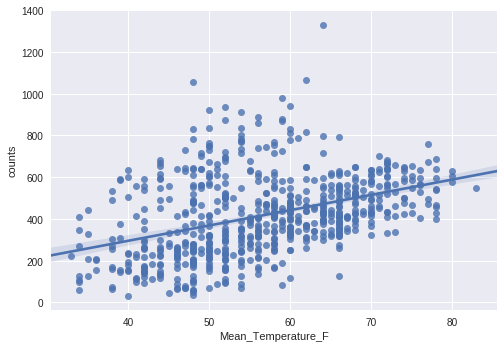

In [8]:
import seaborn as sns

sns.regplot(x="Mean_Temperature_F", y="counts", data=df_combined)

So there appears to be a positive relation between temparature and number of trips. That's promising!

Second i'm going to look at humidity.

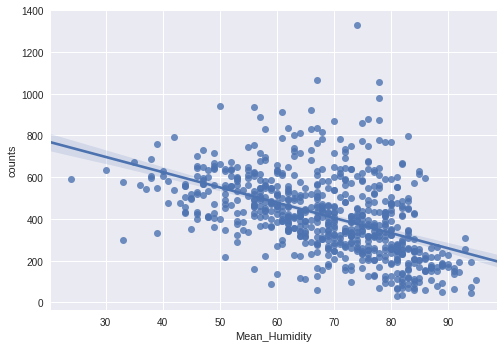

In [9]:
sns.regplot(x="Mean_Humidity", y="counts", data=df_combined)

Humidity has a negative relation! So also good.

Next wind speed:

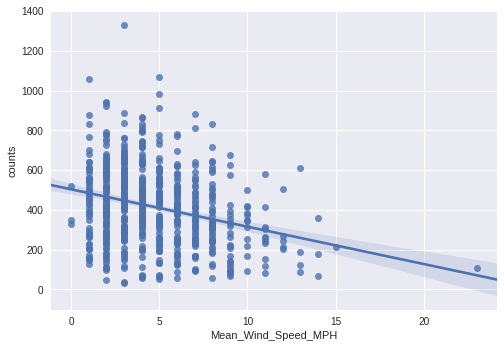

In [10]:
sns.regplot(x="Mean_Wind_Speed_MPH", y="counts", data=df_combined)

In [79]:
(df_combined["Mean_Wind_Speed_MPH"] < 10) & (df_combined["Mean_Wind_Speed_MPH"] > 1)

SyntaxError: invalid syntax (<ipython-input-79-dad7499a3a91>, line 1)

In [80]:
df_combined_lim = df_combined[(df_combined["Mean_Wind_Speed_MPH"] < 10) & (df_combined["Mean_Wind_Speed_MPH"] > 1)];
df_combined_lim.head(n=10)

,Max_Temperature_F,Mean_Temperature_F,Min_TemperatureF,Max_Dew_Point_F,MeanDew_Point_F,Min_Dewpoint_F,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_Pressure_In,...,Min_Sea_Level_Pressure_In,Max_Visibility_Miles,Mean_Visibility_Miles,Min_Visibility_Miles,Max_Wind_Speed_MPH,Mean_Wind_Speed_MPH,Max_Gust_Speed_MPH,Precipitation_In,Events,counts
Date,,,,,,,,,,,,,,,,,,,,,
2014-10-13,71,62.0,54,55,51,46,87,68,46,30.03,...,29.65,10,10,4,13,4,21,0.00,Rain,818
2014-10-14,63,59.0,55,52,51,50,88,78,63,29.84,...,29.54,10,9,3,10,5,17,0.11,Rain,982
2014-10-15,62,58.0,54,53,50,46,87,77,67,29.98,...,29.51,10,9,3,18,7,25,0.45,Rain,626
2014-10-16,71,61.0,52,49,46,42,83,61,36,30.03,...,29.81,10,10,10,9,4,-,0.00,Rain,790
2014-10-17,64,60.0,57,55,51,41,87,72,46,29.83,...,29.73,10,10,6,8,3,-,0.14,Rain,588
2014-10-18,68,64.0,59,59,57,55,90,83,68,29.96,...,29.80,10,8,2,10,4,-,0.31,Rain,798
2014-10-19,73,64.0,55,57,55,53,94,74,52,29.80,...,29.67,10,10,6,10,3,18,0.00,NaN,1332
2014-10-20,66,60.0,55,57,54,50,90,78,67,29.80,...,29.69,10,10,5,12,5,-,0.44,Rain,778
2014-10-21,64,58.0,55,52,49,46,87,70,58,29.93,...,29.74,10,10,6,15,8,21,0.10,Rain,714


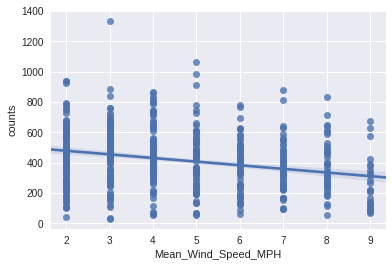

In [81]:
plot_lin = sns.regplot(x="Mean_Wind_Speed_MPH", y="counts", data=df_combined_lim,
           robust=True);

Also looks related, but this one is less clear to me, we'll see what the model can extract?

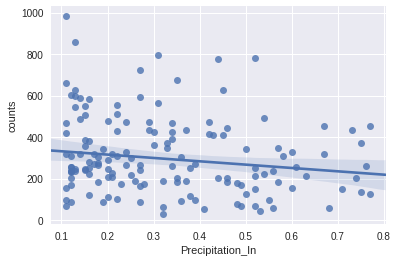

In [84]:
sns.regplot(x="Precipitation_In", y="counts", data=df_combined[(df_combined["Precipitation_In"] < 0.8) & (df_combined["Precipitation_In"] > 0.1)], robust=True)

Here i'm in doubt. It looks slightly related, but that might be the outliers having a large influence?

Next i also think there is a relation with the day of the week, perhaps weekdays are busier than weekend or vice-versa. Let's add the feature and check?

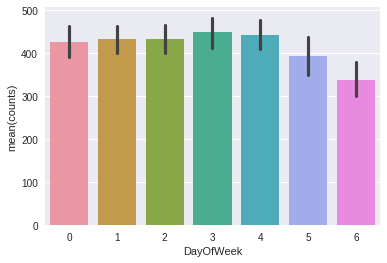

In [136]:
df_combined['DayOfWeek'] = df_combined.index.map(lambda x: x.weekday)

sns.barplot(x="DayOfWeek", y="counts", data=df_combined)

## Machine learning model

So we've have a look at the data and seen that there are some interesting patterns.  We're now ready to try some machine learning!

In [106]:
X = df_combined[["Mean_Temperature_F", "Mean_Humidity", "Precipitation_In", "Mean_Wind_Speed_MPH", "DayOfWeek"]]
y = df_combined['counts']

Unfortunately there is some "N/A" or empty values in the dataset. We'll need to fill them in, in this case i'm just going to put the mean of each column in there.

In [14]:
X = X.fillna(X.mean())

Let's split it into train and test sets

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Now we're ready for training a model!

In [15]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(min_samples_split=8, min_samples_leaf=4)

Let's train and evaluate the model with cross validation - see how it does!

In [92]:
from sklearn.model_selection import cross_val_score, ShuffleSplit

results = cross_val_score(model, X_train, y_train, cv=ShuffleSplit(n_splits=50))
print("Score: %.2f (%.2f)" % (results.mean(), results.std()))

Score: 0.35 (0.15)


Validate on the test set (and we need to fit our model again, this doesn't work with cross_val_score)

In [101]:
model.fit(X_train, y_train);
results = model.score(X_test, y_test);
print("Score: %.2f" % results)

Score: 0.20


Let's try adding more columns, like the Rain column ("Events").
We need to numerify the column first (1 or 0); replacing the "Events" column with "event-id"

Also, Max_Gust_Speed_MPH has empty values as '-' instead of None, so we fix that.

In [137]:
import numpy as np
df_combined['event-id'] = df_combined['Events'].apply(lambda x: 1 if x == 'Rain' else 0)
df_combined['Max_Gust_Speed_MPH'] = df_combined['Max_Gust_Speed_MPH'].apply(lambda x: x if x != '-' else None)
df_noevent = df_combined.drop(['Events'],axis=1)
df_noevent.head()

,Max_Temperature_F,Mean_Temperature_F,Min_TemperatureF,Max_Dew_Point_F,MeanDew_Point_F,Min_Dewpoint_F,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_Pressure_In,...,Max_Visibility_Miles,Mean_Visibility_Miles,Min_Visibility_Miles,Max_Wind_Speed_MPH,Mean_Wind_Speed_MPH,Max_Gust_Speed_MPH,Precipitation_In,counts,event-id,DayOfWeek
Date,,,,,,,,,,,,,,,,,,,,,
2014-10-13,71,62.0,54,55,51,46,87,68,46,30.03,...,10,10,4,13,4,21,0.00,818,1,0
2014-10-14,63,59.0,55,52,51,50,88,78,63,29.84,...,10,9,3,10,5,17,0.11,982,1,1
2014-10-15,62,58.0,54,53,50,46,87,77,67,29.98,...,10,9,3,18,7,25,0.45,626,1,2
2014-10-16,71,61.0,52,49,46,42,83,61,36,30.03,...,10,10,10,9,4,None,0.00,790,1,3
2014-10-17,64,60.0,57,55,51,41,87,72,46,29.83,...,10,10,6,8,3,None,0.14,588,1,4


Now we try out some regressors again, with the new column: "event-id"

In [212]:
from sklearn.neighbors import KNeighborsRegressor

# model2 = KNeighborsRegressor()
model2 = RandomForestRegressor(min_samples_split=100, min_samples_leaf=35)

# Setup new data
X2 = df_noevent[["Mean_Temperature_F", "Mean_Humidity", "Precipitation_In", "Mean_Wind_Speed_MPH", "DayOfWeek","event-id"]]
X2 = X2.fillna(X2.mean())
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.20, random_state=1)

# Fit and score
model2.fit(X_train, y_train);
results = model2.score(X_test, y_test);
print("Fit and Score: %.2f" % results)

# Or cross validation
results = cross_val_score(model2, X_train, y_train, cv=ShuffleSplit(n_splits=50))
print("Cross Val Score: %.2f (%.2f)" % (results.mean(), results.std()))

Fit and Score: 0.22
Cross Val Score: 0.26 (0.12)


Let's try some Neural Network! 
For this, we want TensorFlow instead of SciKit.

To get new packages in your notebook, you have to get into your docker container:
- docker exec -it "your-docker-container-id-or-name" /bin/bash
     - use docker ps or tab completion to see your id / name
- pip install "package"

In [255]:
import tensorflow as tf
from tensorflow.contrib import learn
import random

random.seed(42) # to sample data the same way

Now we setup the Deep Neural Net (DNN) model.
We use a 3 layer DNN with 10, 20, 10 units respectively and a regression output.

Note the use of a helper method to get the column names and types from our X_train dataset.

The model_dir is where snapshots of the model are stored during and after training.

In [250]:
m = tf.contrib.learn.DNNRegressor(feature_columns=learn.infer_real_valued_columns_from_input(X_train),
                                        hidden_units=[10, 20, 10],
                                        model_dir="/tmp/cycle_regressor")

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f0b15b60518>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/cycle_regressor'}


Fit the model on the training data for a while.
Note that the training will continue if you run it again. 
Select a lower number of steps for a shorter training time (and worse performance)

In [254]:
m.fit(X_train, y_train, batch_size=256, steps=100000)

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scal

INFO:tensorflow:global_step/sec: 269.157
INFO:tensorflow:loss = 20608.4, step = 30001 (0.371 sec)
INFO:tensorflow:global_step/sec: 274.837
INFO:tensorflow:loss = 19025.0, step = 30101 (0.364 sec)
INFO:tensorflow:global_step/sec: 278.682
INFO:tensorflow:loss = 23686.8, step = 30201 (0.359 sec)
INFO:tensorflow:global_step/sec: 288.611
INFO:tensorflow:loss = 23986.8, step = 30301 (0.347 sec)
INFO:tensorflow:global_step/sec: 282.608
INFO:tensorflow:loss = 26957.7, step = 30401 (0.354 sec)
INFO:tensorflow:global_step/sec: 283.059
INFO:tensorflow:loss = 16231.7, step = 30501 (0.353 sec)
INFO:tensorflow:global_step/sec: 276.775
INFO:tensorflow:loss = 25391.5, step = 30601 (0.361 sec)
INFO:tensorflow:global_step/sec: 272.043
INFO:tensorflow:loss = 23609.0, step = 30701 (0.368 sec)
INFO:tensorflow:global_step/sec: 274.645
INFO:tensorflow:loss = 44150.6, step = 30801 (0.365 sec)
INFO:tensorflow:global_step/sec: 200.729
INFO:tensorflow:loss = 23772.3, step = 30901 (0.497 sec)
INFO:tensorflow:glob

INFO:tensorflow:global_step/sec: 282.988
INFO:tensorflow:loss = 19967.5, step = 38401 (0.353 sec)
INFO:tensorflow:global_step/sec: 288.307
INFO:tensorflow:loss = 21335.9, step = 38501 (0.347 sec)
INFO:tensorflow:global_step/sec: 278.502
INFO:tensorflow:loss = 15415.6, step = 38601 (0.359 sec)
INFO:tensorflow:global_step/sec: 277.219
INFO:tensorflow:loss = 20994.2, step = 38701 (0.361 sec)
INFO:tensorflow:global_step/sec: 287.814
INFO:tensorflow:loss = 21413.0, step = 38801 (0.348 sec)
INFO:tensorflow:global_step/sec: 286.072
INFO:tensorflow:loss = 18271.8, step = 38901 (0.349 sec)
INFO:tensorflow:global_step/sec: 283.905
INFO:tensorflow:loss = 23828.8, step = 39001 (0.352 sec)
INFO:tensorflow:global_step/sec: 292.909
INFO:tensorflow:loss = 18660.4, step = 39101 (0.342 sec)
INFO:tensorflow:global_step/sec: 285.335
INFO:tensorflow:loss = 38641.5, step = 39201 (0.350 sec)
INFO:tensorflow:global_step/sec: 275.835
INFO:tensorflow:loss = 23479.7, step = 39301 (0.363 sec)
INFO:tensorflow:glob

INFO:tensorflow:global_step/sec: 281.124
INFO:tensorflow:loss = 20984.4, step = 46801 (0.356 sec)
INFO:tensorflow:global_step/sec: 289.962
INFO:tensorflow:loss = 26533.5, step = 46901 (0.345 sec)
INFO:tensorflow:global_step/sec: 292.929
INFO:tensorflow:loss = 31928.7, step = 47001 (0.341 sec)
INFO:tensorflow:global_step/sec: 282.509
INFO:tensorflow:loss = 19740.4, step = 47101 (0.354 sec)
INFO:tensorflow:global_step/sec: 289.022
INFO:tensorflow:loss = 22655.9, step = 47201 (0.346 sec)
INFO:tensorflow:global_step/sec: 287.601
INFO:tensorflow:loss = 23588.3, step = 47301 (0.348 sec)
INFO:tensorflow:global_step/sec: 281.56
INFO:tensorflow:loss = 21350.5, step = 47401 (0.355 sec)
INFO:tensorflow:global_step/sec: 288.202
INFO:tensorflow:loss = 22217.7, step = 47501 (0.347 sec)
INFO:tensorflow:global_step/sec: 276.015
INFO:tensorflow:loss = 26633.6, step = 47601 (0.362 sec)
INFO:tensorflow:global_step/sec: 283.844
INFO:tensorflow:loss = 20390.8, step = 47701 (0.352 sec)
INFO:tensorflow:globa

INFO:tensorflow:global_step/sec: 277.668
INFO:tensorflow:loss = 20864.4, step = 55201 (0.360 sec)
INFO:tensorflow:global_step/sec: 264.625
INFO:tensorflow:loss = 19795.9, step = 55301 (0.378 sec)
INFO:tensorflow:global_step/sec: 284.785
INFO:tensorflow:loss = 21130.0, step = 55401 (0.351 sec)
INFO:tensorflow:global_step/sec: 291.323
INFO:tensorflow:loss = 20595.7, step = 55501 (0.343 sec)
INFO:tensorflow:global_step/sec: 283.317
INFO:tensorflow:loss = 25447.9, step = 55601 (0.353 sec)
INFO:tensorflow:global_step/sec: 285.851
INFO:tensorflow:loss = 32052.7, step = 55701 (0.350 sec)
INFO:tensorflow:global_step/sec: 285.654
INFO:tensorflow:loss = 20465.9, step = 55801 (0.350 sec)
INFO:tensorflow:global_step/sec: 289.146
INFO:tensorflow:loss = 23636.5, step = 55901 (0.346 sec)
INFO:tensorflow:global_step/sec: 283.72
INFO:tensorflow:loss = 19287.2, step = 56001 (0.353 sec)
INFO:tensorflow:global_step/sec: 288.327
INFO:tensorflow:loss = 20183.0, step = 56101 (0.347 sec)
INFO:tensorflow:globa

INFO:tensorflow:global_step/sec: 251.693
INFO:tensorflow:loss = 24556.8, step = 63601 (0.397 sec)
INFO:tensorflow:global_step/sec: 258.249
INFO:tensorflow:loss = 18901.8, step = 63701 (0.387 sec)
INFO:tensorflow:global_step/sec: 280.55
INFO:tensorflow:loss = 14502.1, step = 63801 (0.357 sec)
INFO:tensorflow:global_step/sec: 284.581
INFO:tensorflow:loss = 22691.9, step = 63901 (0.351 sec)
INFO:tensorflow:global_step/sec: 281.45
INFO:tensorflow:loss = 19745.7, step = 64001 (0.355 sec)
INFO:tensorflow:global_step/sec: 286.264
INFO:tensorflow:loss = 18774.0, step = 64101 (0.349 sec)
INFO:tensorflow:global_step/sec: 275.06
INFO:tensorflow:loss = 25732.1, step = 64201 (0.364 sec)
INFO:tensorflow:global_step/sec: 274.719
INFO:tensorflow:loss = 22118.6, step = 64301 (0.364 sec)
INFO:tensorflow:global_step/sec: 271.82
INFO:tensorflow:loss = 14738.8, step = 64401 (0.368 sec)
INFO:tensorflow:global_step/sec: 279.456
INFO:tensorflow:loss = 22160.7, step = 64501 (0.358 sec)
INFO:tensorflow:global_s

INFO:tensorflow:global_step/sec: 287.287
INFO:tensorflow:loss = 23023.9, step = 72001 (0.348 sec)
INFO:tensorflow:global_step/sec: 285.385
INFO:tensorflow:loss = 21978.1, step = 72101 (0.350 sec)
INFO:tensorflow:global_step/sec: 287.182
INFO:tensorflow:loss = 28323.3, step = 72201 (0.348 sec)
INFO:tensorflow:global_step/sec: 290.159
INFO:tensorflow:loss = 23629.8, step = 72301 (0.345 sec)
INFO:tensorflow:global_step/sec: 290.81
INFO:tensorflow:loss = 20482.8, step = 72401 (0.344 sec)
INFO:tensorflow:global_step/sec: 289.299
INFO:tensorflow:loss = 15308.8, step = 72501 (0.346 sec)
INFO:tensorflow:global_step/sec: 288.781
INFO:tensorflow:loss = 22480.6, step = 72601 (0.346 sec)
INFO:tensorflow:global_step/sec: 288.799
INFO:tensorflow:loss = 17481.2, step = 72701 (0.346 sec)
INFO:tensorflow:global_step/sec: 286.802
INFO:tensorflow:loss = 23020.3, step = 72801 (0.349 sec)
INFO:tensorflow:global_step/sec: 286.79
INFO:tensorflow:loss = 21210.2, step = 72901 (0.349 sec)
INFO:tensorflow:global

INFO:tensorflow:global_step/sec: 289.35
INFO:tensorflow:loss = 24952.7, step = 80401 (0.346 sec)
INFO:tensorflow:global_step/sec: 282.932
INFO:tensorflow:loss = 22505.6, step = 80501 (0.353 sec)
INFO:tensorflow:global_step/sec: 291.958
INFO:tensorflow:loss = 18050.3, step = 80601 (0.342 sec)
INFO:tensorflow:global_step/sec: 287.689
INFO:tensorflow:loss = 23362.9, step = 80701 (0.348 sec)
INFO:tensorflow:global_step/sec: 286.899
INFO:tensorflow:loss = 18502.1, step = 80801 (0.348 sec)
INFO:tensorflow:global_step/sec: 290.104
INFO:tensorflow:loss = 23307.5, step = 80901 (0.345 sec)
INFO:tensorflow:global_step/sec: 286.022
INFO:tensorflow:loss = 21436.5, step = 81001 (0.350 sec)
INFO:tensorflow:global_step/sec: 282.8
INFO:tensorflow:loss = 21178.0, step = 81101 (0.354 sec)
INFO:tensorflow:global_step/sec: 287.64
INFO:tensorflow:loss = 43276.4, step = 81201 (0.348 sec)
INFO:tensorflow:global_step/sec: 290.248
INFO:tensorflow:loss = 20619.9, step = 81301 (0.345 sec)
INFO:tensorflow:global_s

INFO:tensorflow:global_step/sec: 285.98
INFO:tensorflow:loss = 24465.1, step = 88801 (0.350 sec)
INFO:tensorflow:global_step/sec: 283.081
INFO:tensorflow:loss = 21267.8, step = 88901 (0.353 sec)
INFO:tensorflow:global_step/sec: 287.598
INFO:tensorflow:loss = 13967.9, step = 89001 (0.348 sec)
INFO:tensorflow:global_step/sec: 281.809
INFO:tensorflow:loss = 16021.2, step = 89101 (0.355 sec)
INFO:tensorflow:global_step/sec: 288.762
INFO:tensorflow:loss = 22901.2, step = 89201 (0.346 sec)
INFO:tensorflow:global_step/sec: 290.182
INFO:tensorflow:loss = 13407.6, step = 89301 (0.345 sec)
INFO:tensorflow:global_step/sec: 281.204
INFO:tensorflow:loss = 21780.0, step = 89401 (0.356 sec)
INFO:tensorflow:global_step/sec: 285.814
INFO:tensorflow:loss = 17043.6, step = 89501 (0.350 sec)
INFO:tensorflow:global_step/sec: 289.57
INFO:tensorflow:loss = 18900.0, step = 89601 (0.345 sec)
INFO:tensorflow:global_step/sec: 284.679
INFO:tensorflow:loss = 24671.4, step = 89701 (0.351 sec)
INFO:tensorflow:global

INFO:tensorflow:global_step/sec: 278.186
INFO:tensorflow:loss = 20775.1, step = 97201 (0.360 sec)
INFO:tensorflow:global_step/sec: 292.686
INFO:tensorflow:loss = 20964.2, step = 97301 (0.342 sec)
INFO:tensorflow:global_step/sec: 288.691
INFO:tensorflow:loss = 31250.1, step = 97401 (0.346 sec)
INFO:tensorflow:global_step/sec: 283.585
INFO:tensorflow:loss = 19623.4, step = 97501 (0.353 sec)
INFO:tensorflow:global_step/sec: 287.93
INFO:tensorflow:loss = 24633.3, step = 97601 (0.347 sec)
INFO:tensorflow:global_step/sec: 283.073
INFO:tensorflow:loss = 19418.7, step = 97701 (0.353 sec)
INFO:tensorflow:global_step/sec: 285.505
INFO:tensorflow:loss = 20831.4, step = 97801 (0.350 sec)
INFO:tensorflow:global_step/sec: 291.218
INFO:tensorflow:loss = 18816.6, step = 97901 (0.343 sec)
INFO:tensorflow:global_step/sec: 293.009
INFO:tensorflow:loss = 12732.3, step = 98001 (0.341 sec)
INFO:tensorflow:global_step/sec: 284.348
INFO:tensorflow:loss = 20444.9, step = 98101 (0.352 sec)
INFO:tensorflow:globa

INFO:tensorflow:loss = 16777.2, step = 105501 (0.361 sec)
INFO:tensorflow:global_step/sec: 279.311
INFO:tensorflow:loss = 24947.4, step = 105601 (0.358 sec)
INFO:tensorflow:global_step/sec: 280.536
INFO:tensorflow:loss = 20812.6, step = 105701 (0.356 sec)
INFO:tensorflow:global_step/sec: 283.599
INFO:tensorflow:loss = 13586.7, step = 105801 (0.353 sec)
INFO:tensorflow:global_step/sec: 284.337
INFO:tensorflow:loss = 20499.1, step = 105901 (0.352 sec)
INFO:tensorflow:global_step/sec: 271.024
INFO:tensorflow:loss = 20578.5, step = 106001 (0.369 sec)
INFO:tensorflow:global_step/sec: 278.566
INFO:tensorflow:loss = 35090.8, step = 106101 (0.359 sec)
INFO:tensorflow:global_step/sec: 274.456
INFO:tensorflow:loss = 24044.1, step = 106201 (0.364 sec)
INFO:tensorflow:global_step/sec: 268.577
INFO:tensorflow:loss = 23728.9, step = 106301 (0.373 sec)
INFO:tensorflow:global_step/sec: 281.643
INFO:tensorflow:loss = 36519.3, step = 106401 (0.355 sec)
INFO:tensorflow:global_step/sec: 277.612
INFO:tenso

INFO:tensorflow:loss = 20280.5, step = 113801 (0.376 sec)
INFO:tensorflow:global_step/sec: 280.563
INFO:tensorflow:loss = 21615.0, step = 113901 (0.356 sec)
INFO:tensorflow:global_step/sec: 270.987
INFO:tensorflow:loss = 23625.2, step = 114001 (0.369 sec)
INFO:tensorflow:global_step/sec: 285.592
INFO:tensorflow:loss = 21123.6, step = 114101 (0.350 sec)
INFO:tensorflow:global_step/sec: 282.355
INFO:tensorflow:loss = 14095.9, step = 114201 (0.354 sec)
INFO:tensorflow:global_step/sec: 280.931
INFO:tensorflow:loss = 18117.4, step = 114301 (0.356 sec)
INFO:tensorflow:global_step/sec: 276.879
INFO:tensorflow:loss = 24091.6, step = 114401 (0.361 sec)
INFO:tensorflow:global_step/sec: 270.244
INFO:tensorflow:loss = 25568.5, step = 114501 (0.370 sec)
INFO:tensorflow:global_step/sec: 269.606
INFO:tensorflow:loss = 19916.0, step = 114601 (0.371 sec)
INFO:tensorflow:global_step/sec: 267.692
INFO:tensorflow:loss = 24232.8, step = 114701 (0.373 sec)
INFO:tensorflow:global_step/sec: 276.853
INFO:tenso

INFO:tensorflow:loss = 20950.8, step = 122101 (0.377 sec)
INFO:tensorflow:global_step/sec: 276.697
INFO:tensorflow:loss = 23400.6, step = 122201 (0.361 sec)
INFO:tensorflow:global_step/sec: 268.654
INFO:tensorflow:loss = 16310.2, step = 122301 (0.372 sec)
INFO:tensorflow:global_step/sec: 283.09
INFO:tensorflow:loss = 20209.5, step = 122401 (0.353 sec)
INFO:tensorflow:global_step/sec: 277.35
INFO:tensorflow:loss = 21206.0, step = 122501 (0.361 sec)
INFO:tensorflow:global_step/sec: 266.561
INFO:tensorflow:loss = 21274.5, step = 122601 (0.375 sec)
INFO:tensorflow:global_step/sec: 208.496
INFO:tensorflow:loss = 22312.0, step = 122701 (0.480 sec)
INFO:tensorflow:global_step/sec: 219.617
INFO:tensorflow:loss = 19439.9, step = 122801 (0.456 sec)
INFO:tensorflow:global_step/sec: 288.72
INFO:tensorflow:loss = 13474.2, step = 122901 (0.346 sec)
INFO:tensorflow:global_step/sec: 279.125
INFO:tensorflow:loss = 24225.1, step = 123001 (0.358 sec)
INFO:tensorflow:global_step/sec: 228.141
INFO:tensorfl

DNNRegressor(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._RegressionHead object at 0x7f0b17e69358>, 'hidden_units': [10, 20, 10], 'feature_columns': (_RealValuedColumn(column_name='', dimension=6, default_value=None, dtype=tf.float64, normalizer=None),), 'optimizer': None, 'activation_fn': <function relu at 0x7f0b4bc73e18>, 'dropout': None, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None})

Now that we've trained, we can see how well it predicts our test set!

In [256]:
predicted_y = np.array(list(m.predict(X_test)))
print(predicted_y)
print(type(predicted_y))

Instructions for updating:
Please switch to predict_scores, or set `outputs` argument.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Restoring parameters from /tmp/cycle_regressor/model.ckpt-124000
[ 453.6456604   443.82272339  530.53137207  191.9455719   393.50097656
  430.16741943  457.81420898  477.12255859  397.91244507  360.49459839
  231.99617004  512.96777344  244.91011047  173.48210144  407.3366394
  534.88360596  174.11029053  359.95889282  500.81661987  232.11889648
  560.19158936  609.80059814  325.31643677  399.63449097  408.35775757
  429.81729126  356.16220093  409.84899902  475.52609253  458.53121948
  487.16113281  511.96859741  348.49716187  425.3760376   495.34066772
  455.21096802  190.55331421  50

While these are the real y values

In [241]:
print(y_test.values)
print(type(y_test.values))

[458 592 218 126 271 253 406 344 425 202 185 385 244 414 378 349 123 156
 560 272 656 606 250 552 382 504 392 370 369 472 876 368 498 340 504 410
  82 343 212 500 628 358 460 509 189 156 245 936 330 640 439 341 392 409
 510 207 558 388 592 832 442 449 307 434 588 285 393 282 232 194 504 524
 248  73 167 230 355 422 228 338 290  96 323 248 574 259 574 378 520 252
 569 110 539 496 606 407  52 156 416 202 378 478 260  64 257 399 429 470
 203 548 540 286 370 818 372 319 672 454 880 347 311 302 515 388 748 226
 387 384 244 492 168 514 860 596 469 642 356 548]
<class 'numpy.ndarray'>


Regression can have multiple types of accuracy / error measurement.

Here we show the Mean Absolute Error (MAE) and the R^2 score. The latter is what our SKLearn models used earlier in their .score() functions.

The MAE should be low (towards 0), while the R^2 should be nearing 1.0 with good results.

In [257]:
from sklearn.metrics import mean_absolute_error
print("MAE: %.2f" %  mean_absolute_error(y_test.values, predicted_y.round()))

from sklearn.metrics import r2_score
print("Score: %.2f" % r2_score(y_test.values, predicted_y.round()))

MAE: 107.96
Score: 0.37
